In [1]:
import numpy as np
import torch
import csv
import enum
import cv2
import random
import pandas as pd
from pathlib import Path
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt

In [18]:
# covid csv
csv_path = '/home/tony/datasets/Covid-all/metadata.csv'
df = pd.read_csv(csv_path, encoding='ISO-8859-1')
file_names = list(df['filename'])
str_labels = list(df['finding'])

pos_list = []  # 767
neg_list = []  # 146
for file_name, str_label in zip(file_names, str_labels):
    if 'jpg' in file_name or 'jpeg' in file_name or 'png' in file_name:
        pass
    else:
        continue
    if file_name == 'FAFA-A1BF-49A8-A1D3-66FAFA41B7345D.jpg':
        continue
    if str_label == 'COVID-19':
        pos_list.append(file_name)
    else:
        neg_list.append(file_name)
print(len(pos_list))
print(len(neg_list))

random.seed(0)
random.shuffle(pos_list)
random.seed(0)
random.shuffle(neg_list)
N_VAL_POS = 70
N_VAL_NEG = 30

output_csv_path = '/home/tony/datasets/Covid-all/697_116.csv'
with open(output_csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for i, _path in enumerate(pos_list):
        _type = 'Validation' if i < N_VAL_POS else 'Training'
        writer.writerow([_path, 1, _type])
    for i, _path in enumerate(neg_list):
        _type = 'Validation' if i < N_VAL_NEG else 'Training'
        writer.writerow([_path, 0, _type])

767
146


In [22]:
# luna csv
data_dir = Path('/home/tony/datasets/Covid-all/luna')
data_paths = list(data_dir.glob('*.npy'))
csv_path = '/home/tony/datasets/Covid-all/luna_1000_50.csv'
random.seed(0)
random.shuffle(data_paths)

with open(csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for i, _path in enumerate(data_paths):
        if i >= 1050:
            break
        _type = 'Training' if i < 1000 else 'Validation'
        writer.writerow([_path.parts[-1], _type])

In [17]:
# testing file loading
csv_path = '/home/tony/datasets/Covid-all/697_116.csv'
with open(csv_path, "r") as f:
    rows = csv.reader(f)
    for i, row in tqdm(enumerate(rows)):
        _path, label, _type  = row
        _path = '/home/tony/datasets/Covid-all/images/' + _path
        im = cv2.imread(_path)
        try:
            s = im.shape
        except:
            print(_path)

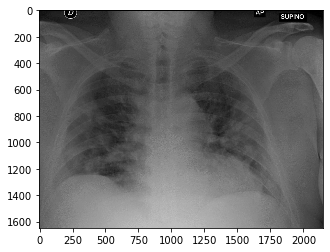

In [3]:
csv_path = '/home/tony/datasets/Covid-all/metadata.csv'
df = pd.read_csv(csv_path, encoding='ISO-8859-1')
file_names = list(df['filename'])
str_labels = list(df['finding'])
data_dir = Path('/home/tony/datasets/Covid-all/images')
im = cv2.imread(str(data_dir / Path(file_names[100])))
plt.imshow(im)

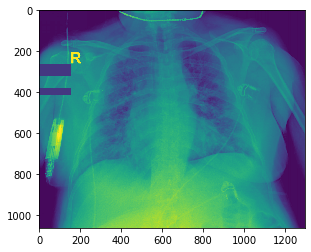

In [10]:
im = cv2.imread('/home/tony/datasets/Covid-all/images/covid-19-pneumonia-19.jpg')
plt.imshow(im[:, :, 0])

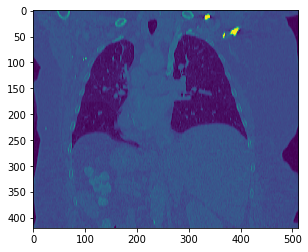

In [22]:
data_path = Path('/home/tony/datasets/LUNA/luna_2d/luna_0.npy')
im = np.load(data_path)
plt.imshow(im)

In [ ]:
with open(csv_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for i, _path in enumerate(data_paths):
        _type = 'Training' if i < train_data_num else 'Validation'
        writer.writerow([_path.parts[-1], _type])

In [23]:
cnt = 0
covid_cnt = 0
for cls in str_labels:
    cnt += 1
    if cls == 'COVID-19':
        covid_cnt += 1
print(cnt)
print(covid_cnt)

1022
875


In [18]:
im[:, :, 0] == im[:, :, 2]

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [58]:
for param in model.parameters():
    param.requires_grad = False
for param in model.fc1.parameters():
    param.requires_grad = True

In [60]:
for name, child in model.named_children():
    print(name, child)

conv1 Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
pool MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
conv2 Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
fc1 Linear(in_features=400, out_features=10, bias=True)


In [19]:
folder_path = Path('/home/tony/datasets/Mango/')
# csv_path = folder_path / Path('train.csv')
csv_path = folder_path / Path('dev.csv')
data_paths = []

class_type = {}
class_type['A'] = 0
class_type['B'] = 1
class_type['C'] = 2

label_cnt = [0, 0, 0]

max_h, max_w = 0, 0
min_h, min_w = 9999, 9999
with open(csv_path, "r") as f:
    rows = csv.reader(f)
    for i, row in tqdm(enumerate(rows)):
        if i == 0:
            continue
        num_img, label = row
        img_path = str(folder_path / Path('traindev') / Path(num_img))
    
        label_cnt[class_type[label]] += 1
        img = cv2.imread(img_path)
        if img.shape[0] > max_h:
            max_h = img.shape[0]
        if img.shape[1] > max_w:
            max_w = img.shape[1]
        if img.shape[0] < min_h:
            min_h = img.shape[0]
        if img.shape[1] < min_w:
            min_w = img.shape[1]
        
        data_paths.append((img_path, class_type[label]))
        
print(label_cnt)


[243, 293, 264]


In [6]:
def bgr2rgb(img_bgr):
    return np.concatenate((img_bgr[:, :, 2:], img_bgr[:, :, 1:2], img_bgr[:, :, 0:1]), axis=2) 

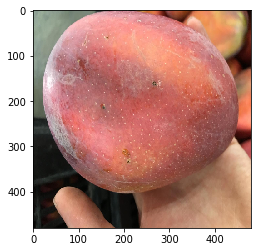

In [15]:
img_bgr = cv2.imread(data_paths[3][0])
img_bgr = cv2.resize(img_bgr, (480, 480), interpolation=cv2.INTER_CUBIC)
plt.imshow(bgr2rgb(img_bgr))

In [ ]:
def loadData(filename):
    fr = open(filename)
    lines = fr.readlines()
    dataset = np.zeros((len(lines),256))
    index = 0
    for line in lines:  
        line = line.strip().split(' ')
        dataset[index] = list(line)[1:] 
        index += 1
    return dataset

train_data = loadData('home')

In [ ]:
def tanh(self,s):
    return (np.exp(s)-np.exp(-s)) / (np.exp(s)+np.exp(-s))

def tanh_deriv(self,s):
    return 1 - self.tanh(s)**2

In [2]:
im = np.load('/home/tony/Desktop/tmp.npy').transpose(1, 2, 0)

In [4]:
im = im - im.min()
im = im / im.max()

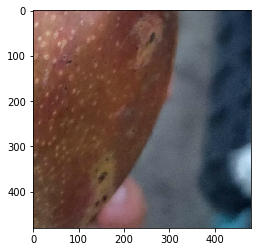

In [5]:
plt.imshow(im)